## 导入模块

In [2]:
import os
os.getcwd()

'/home/jiajianhao/文档/cnn/my_Magnetic_methods-master'

In [3]:
from Utils.Models import *
from Utils.My_Utils_Magnetic_methods import *
# 设置默认字体为黑体
plt.rcParams['font.family'] = ['WenQuanYi Zen Hei']  # 黑体
# 或者设置能够支持中文的其他字体名称
# plt.rcParams['font.family'] = ['SimSun']  # 宋体

# 对于负号显示问题，确保正常显示
plt.rcParams['axes.unicode_minus'] = False


## 单个物体及标注可视化

### 球体

[-4.925  3.05   4.7    4.05 ]


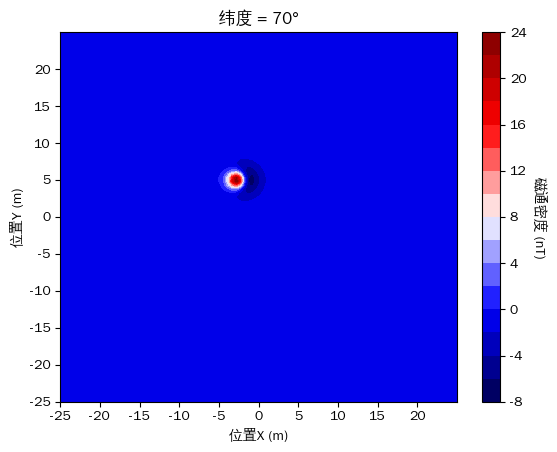

In [5]:
test_diple = Dipole(x=5,y=-2.5,r=0.18,h=1.8,Latitudes=70)
bbox = test_diple.bbox
print(bbox)
test_diple.Plot_X_array_raw()


### 椭球

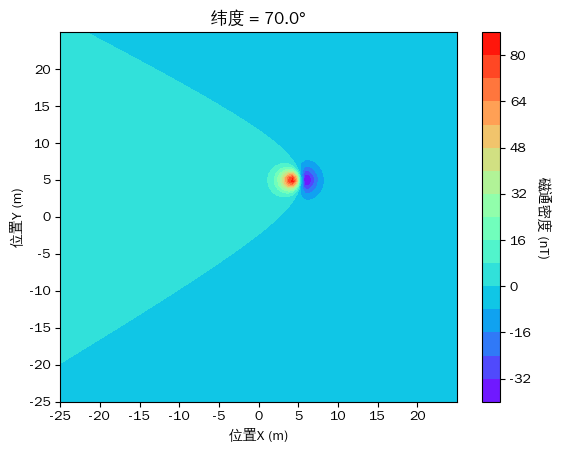

In [4]:
test_elli = Ellipse(x=5,y=5,a=0.24,b=0.14,c = 0.14,h=1.8,gama=90,theta=90,phi=90)
test_elli2 = Ellipse(a=0.15)
# test_elli.F = test_elli.F +test_elli2.F
test_elli.Plot_X_array_raw()

In [5]:
print(f'球体异常极值{np.max(test_diple.F)},{np.min(test_diple.F)}')
print(f'椭球异常极值{np.max(test_elli.F)},{np.min(test_elli.F)}')

球体异常极值23.418940539173512,-6.823206387991518
椭球异常极值83.30581036287994,-39.731894590810924


### 圆柱体

## 最多9个物体同图及标注生成

### 全为球体

In [6]:
data_num = 100
noise_num = 100

In [7]:
parameter, num_of_dipoles, bbox,data = generate_random_muti_dipole(data_num=data_num)

In [8]:
data= X_array_reship(data)
map_lenght = 25
zmax = 416
X = np.linspace(-map_lenght, map_lenght, zmax)
Y = np.linspace(-map_lenght, map_lenght, zmax)

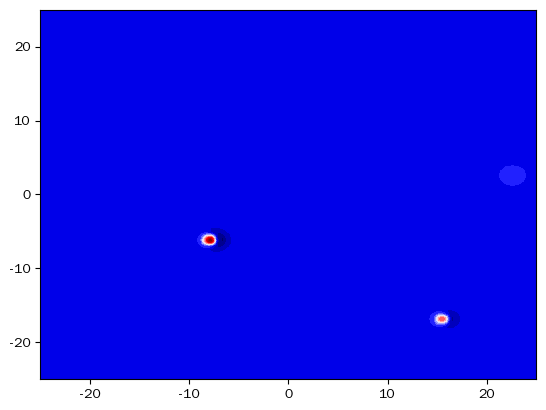

In [9]:
plt.contourf(X,Y,data[2], levels=16, cmap='seismic')
plt.show()

Dipole_0: x0: 18.2, y0: -10.1, w: 4.7, h:4.0
Dipole_1: x0: -2.6, y0: -18.2, w: 4.7, h:4.1
Dipole_2: x0: 6.2, y0: 20.7, w: 4.7, h:4.1
Dipole_0: x0: -25.0, y0: -19.8, w: 3.1, h:4.1
Dipole_1: x0: -25.0, y0: 14.7, w: 3.5, h:4.1
Dipole_2: x0: 6.2, y0: 22.7, w: 4.7, h:2.3


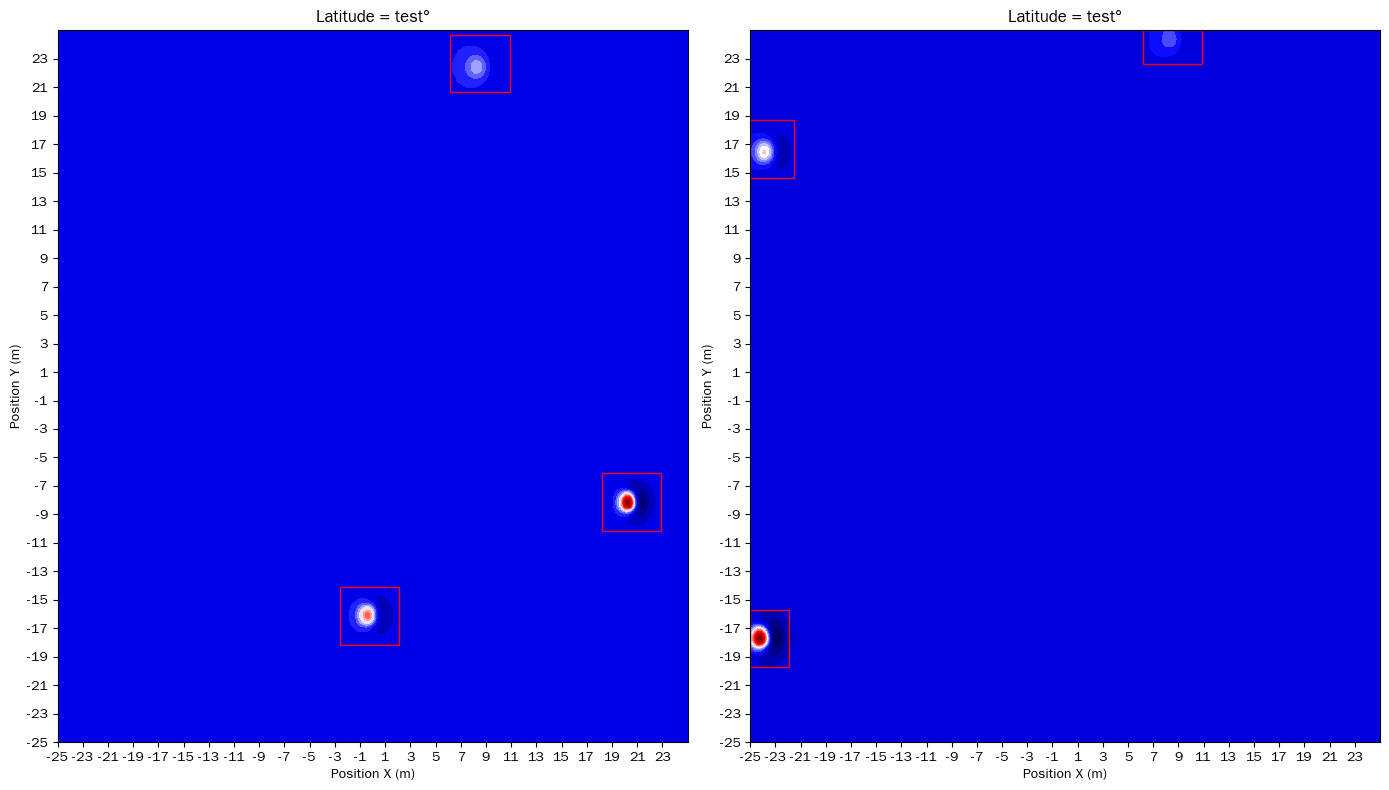

In [10]:
Plot_X_data(num_of_dipoles, bbox, data)

In [11]:
gass_id = add_gaussian_noise(data,n_models_with_noise=noise_num)

Dipole_0: x0: -17.4, y0: 1.0, w: 4.7, h:4.0
Dipole_0: x0: 16.2, y0: 19.0, w: 4.7, h:4.1
Dipole_1: x0: -1.8, y0: -23.3, w: 4.7, h:4.1
Dipole_2: x0: -0.2, y0: -9.8, w: 4.7, h:4.0
Dipole_3: x0: -18.6, y0: -21.8, w: 4.7, h:4.1
Dipole_4: x0: -7.8, y0: 9.9, w: 4.7, h:4.1
Dipole_5: x0: 6.6, y0: 18.2, w: 4.7, h:4.1
Dipole_6: x0: 11.0, y0: -13.0, w: 4.7, h:4.1
Dipole_7: x0: 3.8, y0: 14.7, w: 4.7, h:4.1


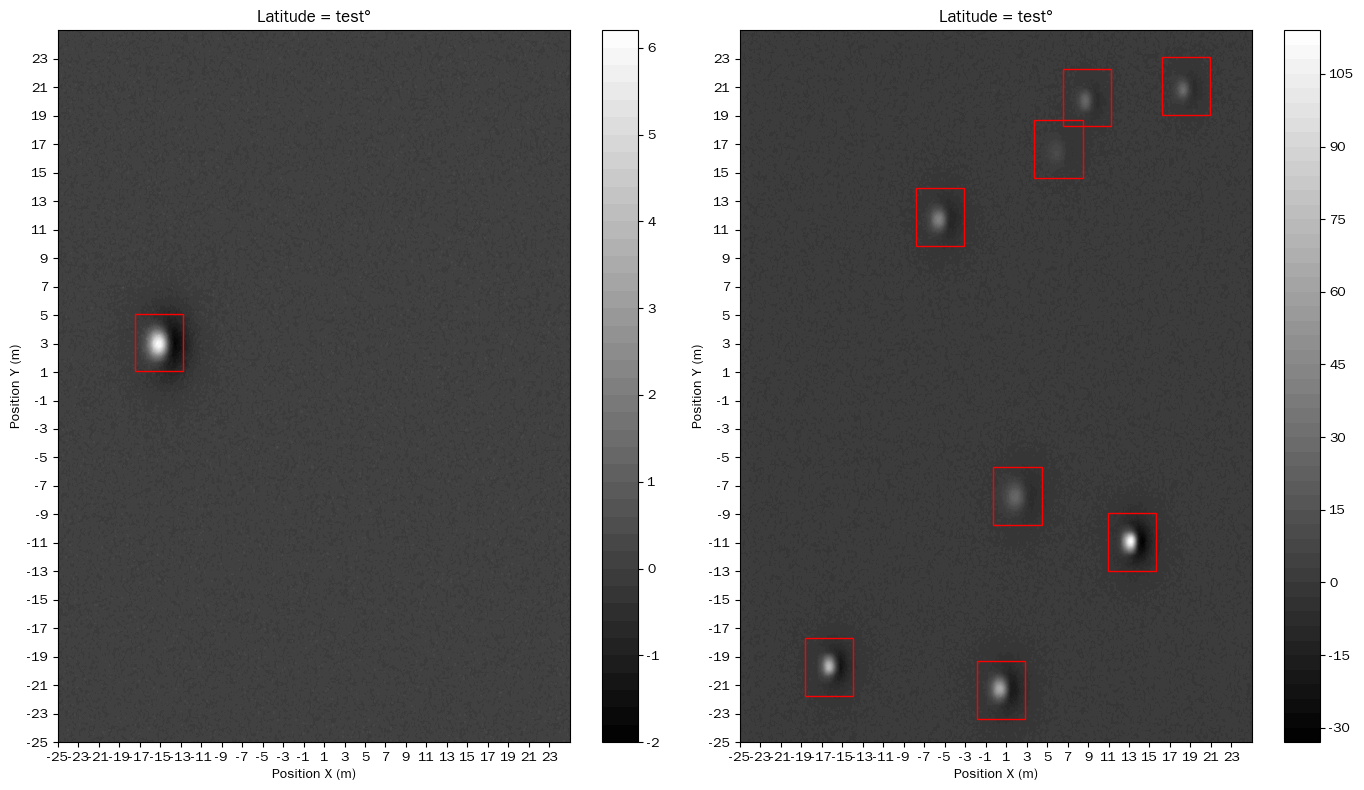

In [12]:
Plot_X_data_with_noise(num_of_dipoles, bbox, data,gass_id)

In [13]:
def mapping_rgb(num):
    rgb = np.zeros(3,dtype=np.float64)  # 0:r 1:g 2:b
    col_num = 1279  # 5*256-1
    if 0 <= num < 0.2:
        rgb[0] = 255 - col_num*num
        rgb[2] = 255
    elif 0.2 <= num < 0.4:
        num = num-0.2
        rgb[1] = col_num*num
        rgb[2] = 255

    elif 0.4 <= num < 0.6:
        num = num-0.4
        rgb[1] = 255
        rgb[2] = 255-col_num*num
    elif 0.6 <= num < 0.8:
        num = num-0.6
        rgb[1] = 255
        rgb[0] = col_num*num
    else:
        num = num-0.8
        rgb[0] = 255
        rgb[1] = 255-col_num*num
    r,g,b = rgb
    
    return r*256*256 + g*256 + b

mapping_rgb = np.vectorize(mapping_rgb)

In [17]:
import numpy as np

# 创建示例数组
labels = np.random.randint(0, 10, (100, 416, 416))  # 随机生成标签数组
values = np.random.rand(100, 416, 416)  # 随机生成数值数组
modified_values = np.random.rand(100, 416, 416)  # 随机生成修改后的数值数组

# 选择标签为特定值的索引
label_to_modify = 3  # 选择要修改的标签值
mask = labels == label_to_modify  # 创建布尔掩码，标记与指定标签匹配的位置

# 根据掩码对相应位置的值进行修改
values[mask] = modified_values[mask]

# 输出结果
print(values)


[[[0.40719918 0.09075311 0.68430183 ... 0.90505151 0.77418407 0.23515849]
  [0.5064707  0.40182746 0.17767196 ... 0.20962043 0.77056013 0.29683721]
  [0.65974589 0.85921892 0.4898486  ... 0.68016016 0.75274147 0.82260663]
  ...
  [0.8227501  0.97329509 0.83413625 ... 0.47238134 0.38940537 0.3087469 ]
  [0.28733683 0.73028601 0.19862338 ... 0.53552114 0.13933805 0.84268584]
  [0.5174377  0.49202815 0.02767814 ... 0.82122843 0.79067369 0.14050263]]

 [[0.41235581 0.2391961  0.78319883 ... 0.14862741 0.06815891 0.76241466]
  [0.51185966 0.46087685 0.76458785 ... 0.48156207 0.3522272  0.4285519 ]
  [0.08683453 0.17185966 0.36078977 ... 0.16855603 0.33898488 0.43627711]
  ...
  [0.90408652 0.03875822 0.30041153 ... 0.51792754 0.7960616  0.94416477]
  [0.81385937 0.25012841 0.11102501 ... 0.60607456 0.00662973 0.37801224]
  [0.90402746 0.37694552 0.37193175 ... 0.63543294 0.6681754  0.1755502 ]]

 [[0.4218741  0.713572   0.42053986 ... 0.29816269 0.68941417 0.063119  ]
  [0.37008108 0.746297

In [24]:
def map_rgb(data):
    """
    对正则化后的数据进行rgb映射
    """
    zeros_data = np.zeros_like(data)
    N,width,hight = data.shape

    


    # 取余填值
    RGB = ((data % 0.2)*5*255).astype(np.uint8)
    RGB2 = (255 - RGB).astype(np.uint8)
    FullRGB = np.ones_like(RGB)*255
    R = np.zeros_like(RGB)
    G = np.zeros_like(RGB)
    B = np.zeros_like(RGB)

    print(RGB2.shape)
    # 取整分段
    labels = data//0.2
    mask0 = (labels == 0)
    mask1 = (labels == 1)
    mask2 = (labels == 2)
    mask3 = (labels == 3)
    mask4 = (labels == 4)
    all_mask = [mask0,mask1, mask2, mask3, mask4]



    R[mask0] = RGB[mask0]   # 255-0
    # G此时为0,无需改变,下面同理
    B[mask0] = FullRGB[mask0]  # 255

    G[mask1] = RGB[mask1]  # 0-255
    B[mask1] = FullRGB[mask1]  # 255

    G[mask2] = FullRGB[mask2]  # 255
    B[mask2] = RGB2[mask2]  # 255-0

    R[mask3] = RGB[mask3]  # 0-255
    G[mask3] = FullRGB[mask3]  # 255

    R[mask4] = FullRGB[mask4]  # 255
    G[mask4] = RGB2[mask4]  # 255-0

    data_RGB = np.stack((R, G, B), axis=-1)
    return data_RGB


def convert_to_YOLO_mix(
        num_of_dipoles, bbox, X_data_array, root_dir=None, map_length=25):
    num_of_datas, imgsize = X_data_array.shape[:2]
    # rgb_num = 16777215  # RGBnum 2^8^3-1

    # 预处理
    # box转yolo格式
    length = int(map_length*2)
    bbox[:, :, 0] = bbox[:, :, 0]+bbox[:, :, 2]/2 + map_length
    bbox[:, :, 1] = bbox[:, :, 1]+bbox[:, :, 3]/2 + map_length
    YOLO_box = bbox/length

    # 归一化
    X_data_array_norm = np.zeros_like(X_data_array)
    for i in range(num_of_datas):
        X_data_array_norm[i] = (X_data_array[i] - np.min(X_data_array[i])) / (
            np.max(X_data_array[i]) - np.min(X_data_array[i]))

    # 转rgb
    dataRGB = map_rgb(X_data_array_norm)
    # 如果不存在则创建文件夹,包含 train,val,test
    if root_dir is None:
        root_dir = "/home/jiajianhao/文档/cnn/my_Magnetic_methods-master/data/YOLOv8"  # type: ignore
    if not os.path.exists(root_dir):
        os.mkdir(root_dir)
        os.mkdir(f'{root_dir}/train')
        os.mkdir(f'{root_dir}/val')
        os.mkdir(f'{root_dir}/test')

    n1 = int(num_of_datas*0.7)
    n2 = int(num_of_datas*0.95)
    flags = ["train", "val", "test"]  # 数据前缀
    n_each_flag = [0, n1, n2, num_of_datas]  # 数据大小
    count_each = [0, 0, 0]  # 数据名后缀

    for f_num in range(len(flags)):
        flag = flags[f_num]
        dir_name = f'{root_dir}/{flag}'
        Start = n_each_flag[f_num]
        End = n_each_flag[f_num+1]
        os.chdir(dir_name)
        for bb_n_models in range(Start, End):
            count_each[f_num] += 1
            count = count_each[f_num]

            color_mapped_bgr = cv2.cvtColor(
                dataRGB[bb_n_models], cv2.COLOR_RGB2BGR)

            cv2.imwrite(f"{flag}_{count}.jpg", color_mapped_bgr)

            for bb_n_dipoles in range(num_of_dipoles[bb_n_models]):

                if bb_n_dipoles == 0:

                    with open(f"{flag}_{count}.txt", "w") as f:
                        f.write('0' + ' ' + str(YOLO_box[bb_n_models, bb_n_dipoles, 0]) + ' ' + str(
                            YOLO_box[bb_n_models, bb_n_dipoles, 1]) + ' ' + str(YOLO_box[bb_n_models, bb_n_dipoles, 2]) + ' ' + str(YOLO_box[bb_n_models, bb_n_dipoles, 3]))

                else:
                    with open(f"{flag}_{count}.txt", "a") as f:
                        f.write('\n' + '0' + ' ' + str(YOLO_box[bb_n_models, bb_n_dipoles, 0]) + ' ' + str(
                            YOLO_box[bb_n_models, bb_n_dipoles, 1]) + ' ' + str(YOLO_box[bb_n_models, bb_n_dipoles, 2]) + ' ' + str(YOLO_box[bb_n_models, bb_n_dipoles, 3]))



data2 = data
bbox2 = bbox
root_dir = "/home/jiajianhao/文档/cnn/my_Magnetic_methods-master/data/YOLOv8"
convert_to_YOLO_mix(num_of_dipoles, bbox2, X_data_array=data2, map_length=25,root_dir=root_dir)

(100, 416, 416)


### 球体与椭球

生成 训练数据集

In [4]:
Property = [1,0]
Property = [0.3,0.7]
# Property = [0,1]
seed = 54

In [5]:
parameter, num_of_dipoles,kind_of_data, bbox,data = generate_random_muti_mix_data(data_num=100,seed=seed,property=Property)

In [6]:
map_lenght = 25
zmax = 512
data= X_array_reship(data,map_lenght,zmax)
X = np.linspace(-map_lenght, map_lenght, zmax)
Y = np.linspace(-map_lenght, map_lenght, zmax)
root_dir = f"/home/jiajianhao/文档/cnn/my_Magnetic_methods-master/data/test"
convert_to_YOLO_mix(num_of_dipoles, bbox, data,kind_of_data, map_length=25,root_dir=root_dir)
gass_id = add_gaussian_noise(data,n_models_with_noise=100)
root_dir = f"/home/jiajianhao/文档/cnn/my_Magnetic_methods-master/data/test_with_noise"
convert_to_YOLO_mix(num_of_dipoles, bbox, data,kind_of_data, map_length=25,root_dir=root_dir)


### 生成深度测试
根据原始数据及标注生成训练集与验证集,根据yolo预测结果生成测试集

## 保存数据